# 🌍 Midterm Practice — GAPMINDER
**Họ tên:** ___ ; **MSSV:** ___ ; **Số máy:** ___

Dataset: `gapminder_tidy.csv`

## A1) Đọc dữ liệu & xem nhanh

In [45]:
# ====== IMPORT ======
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, math
from scipy.stats import binom, poisson, norm

In [46]:
#thư viện
import pandas as pd, numpy as np, matplotlib.pyplot as plt

#read
df = pd.read_csv('/Users/trangnguyen/Downloads/HKI_4/GK_TKMT/ôn_thi_KT/data/gapminder_tidy.csv')
display(df.head())
# display(df.tail(10))

#in
print('Shape:', df.shape)
print('\nMissing per col:\n', df.isna().sum())

,Country,Year,fertility,life,population,child_mortality,gdp,region
0,Afghanistan,1964,7.671,33.639,10474903.0,339.7,1182.0,South Asia
1,Afghanistan,1965,7.671,34.152,10697983.0,334.1,1182.0,South Asia
2,Afghanistan,1966,7.671,34.662,10927724.0,328.7,1168.0,South Asia
3,Afghanistan,1967,7.671,35.170,11163656.0,323.3,1173.0,South Asia
4,Afghanistan,1968,7.671,35.674,11411022.0,318.1,1187.0,South Asia


Shape: (10111, 8)

Missing per col:
 Country               0
Year                  0
fertility            11
life                  0
population            3
child_mortality     901
gdp                1111
region                0
dtype: int64


## A2) Thuộc tính định tính vs định lượng

In [47]:
#định tính
qual_cols = df.select_dtypes(include=["object","category","bool"]).columns.tolist()

#định lượng
quant_cols = df.select_dtypes(include=['number']).columns.tolist()
print('Định tính:', qual_cols)
print('Định lượng:', quant_cols)

Định tính: ['Country', 'region']
Định lượng: ['Year', 'fertility', 'life', 'population', 'child_mortality', 'gdp']


## A3) Xử lý thiếu dữ liệu & trùng lặp

In [48]:
#xử lý với hàm duplicated()
print('Duplicated rows:', df.duplicated().sum())

#làm sạch dữ liệu trùng lặp
df_clean = df.dropna().drop_duplicates()
print('New shape:', df_clean.shape)

Duplicated rows: 0
New shape: (8836, 8)


## A4) Đặc trưng định lượng

In [12]:
#đặc trưng là tb, tv, std, min ,max 
desc = df_clean.select_dtypes('number').agg(['mean','median','std','min','max']).T
desc

,mean,median,std,min,max
Year,1.988623e+03,1989.000,1.440554e+01,1964.000,2.013000e+03
fertility,4.096088e+00,3.794,2.042115e+00,0.836,8.449000e+00
life,6.357669e+01,66.661,1.131389e+01,6.000,8.358000e+01
population,2.857723e+07,5408103.000,1.100437e+08,36801.000,1.359368e+09
child_mortality,8.317598e+01,54.500,7.985145e+01,2.000,4.358000e+02
gdp,1.268014e+04,6299.000,1.791489e+04,142.000,1.826680e+05


In [49]:
# 2️⃣ Thống kê số năm, quốc gia và khu vực
print('--------------------------------------------------------------------')
num_years = df["Year"].nunique() if "Year" in df.columns else None
num_countries = df["Country"].nunique() if "Country" in df.columns else None
num_regions = df["region"].nunique() if "region" in df.columns else None

print(f"Số năm (Year): {num_years}")
print(f"Số quốc gia (Country): {num_countries}")
print(f"Số khu vực (region): {num_regions}")
print('--------------------------------------------------------------------')


--------------------------------------------------------------------
Số năm (Year): 50
Số quốc gia (Country): 204
Số khu vực (region): 6
--------------------------------------------------------------------


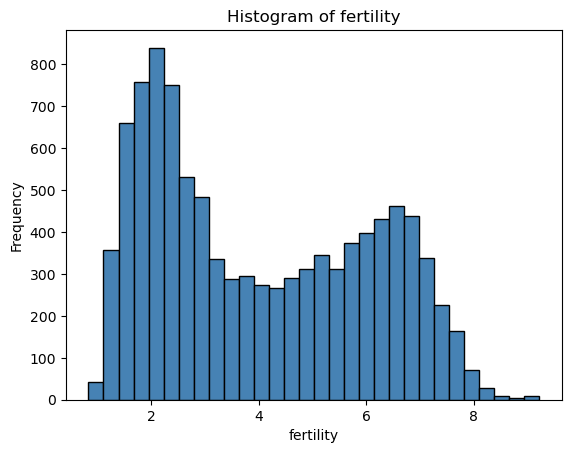

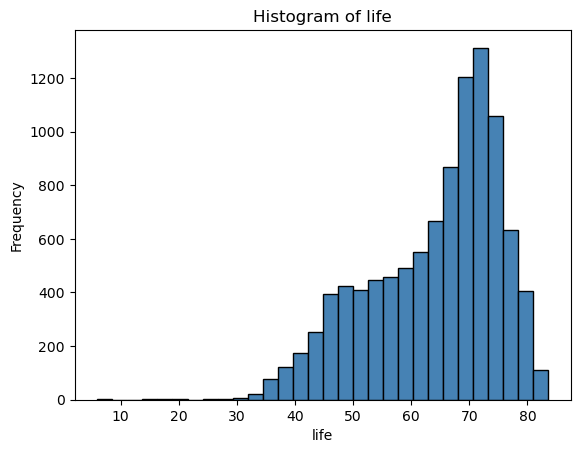

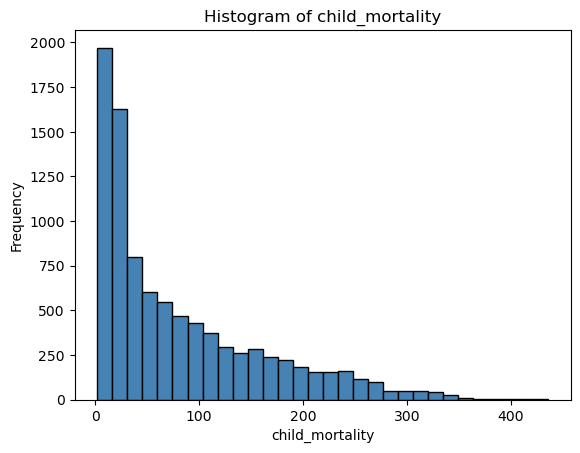

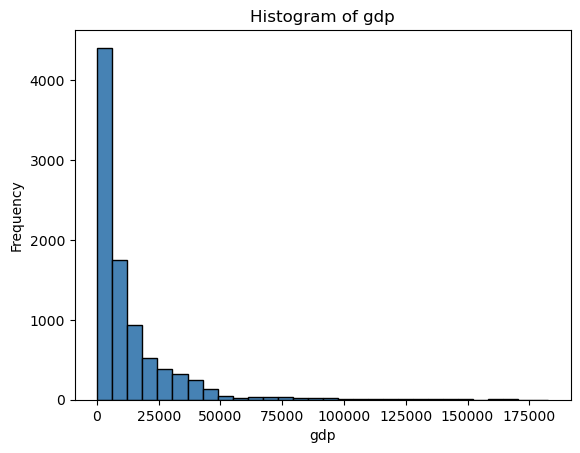

In [19]:
# 3️⃣ Vẽ histogram cho 4 thuộc tính quan sát --------------------------------
observed_features = ["fertility", "life", "child_mortality", "gdp"]
for col in observed_features:
    if col in df.columns:
        plt.figure()
        plt.hist(df[col].dropna(), bins=30, color="steelblue", edgecolor="black")
        plt.title(f"Histogram of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()


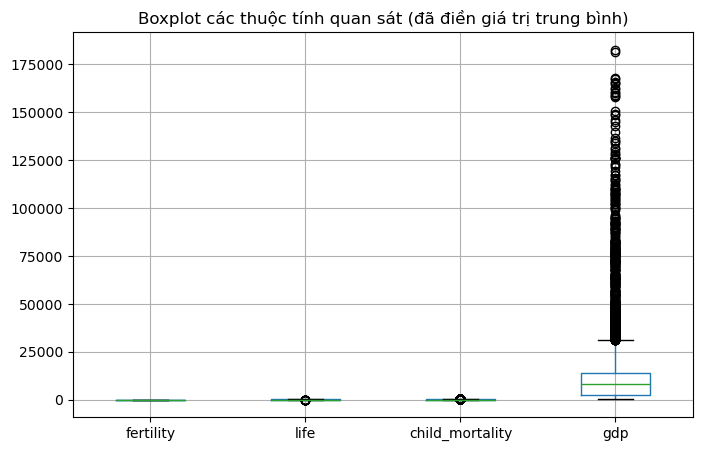

In [30]:
# 4️⃣ Điền giá trị thiếu bằng trung bình & vẽ boxplot ------------------------
df_filled = df.copy()
for col in observed_features:
    if col in df_filled.columns:
        mean_val = df_filled[col].mean()
        df_filled[col] = df_filled[col].fillna(mean_val)

plt.figure(figsize=(8, 5))
df_filled[observed_features].boxplot()
plt.title("Boxplot các thuộc tính quan sát (đã điền giá trị trung bình)")
plt.show()

,fertility,life,child_mortality,gdp
region,,,,
America,3.486061,68.722251,55.000832,11829.320833
East Asia & Pacific,3.726025,66.108632,63.110822,13225.375338
Europe & Central Asia,2.221266,71.931303,33.662653,18086.099870
Middle East & North Africa,4.970019,65.194301,70.572816,26104.653968
South Asia,5.004162,57.137710,137.767150,2552.650000
Sub-Saharan Africa,5.956105,51.664426,156.356352,3728.097800


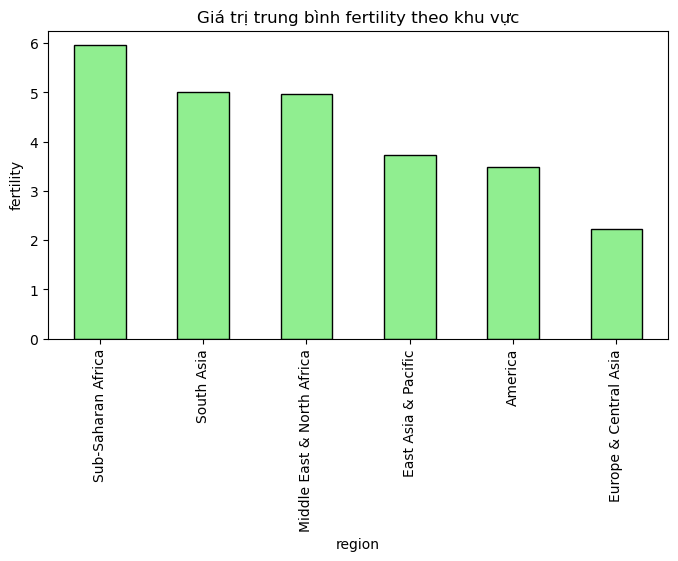

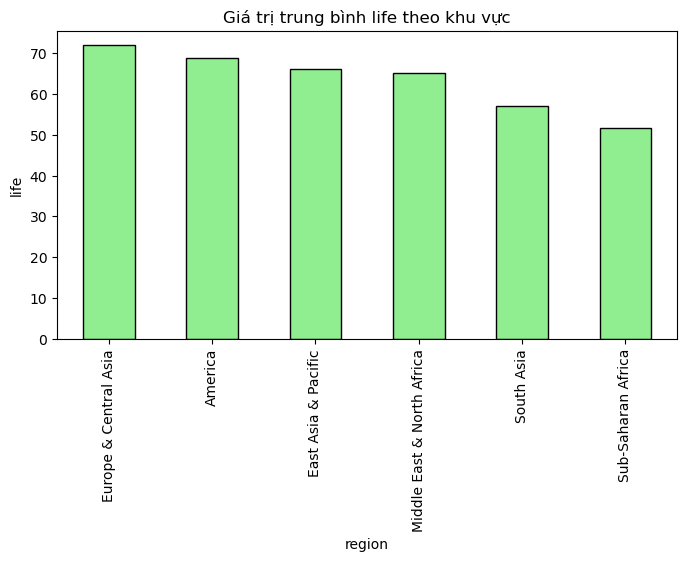

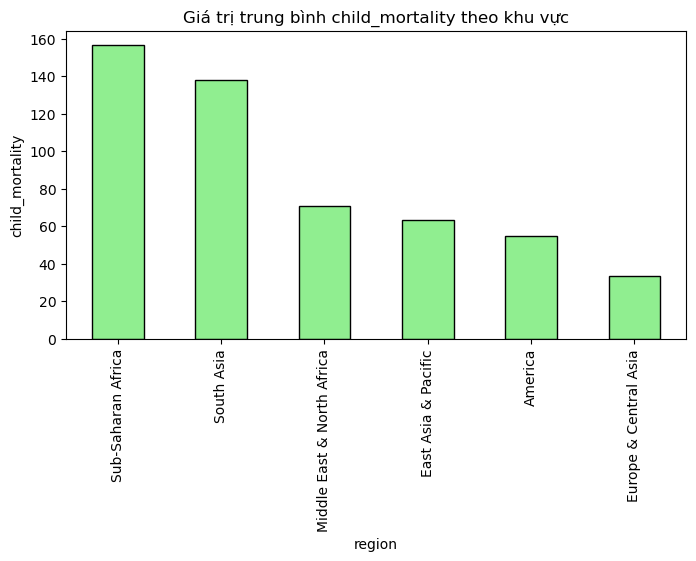

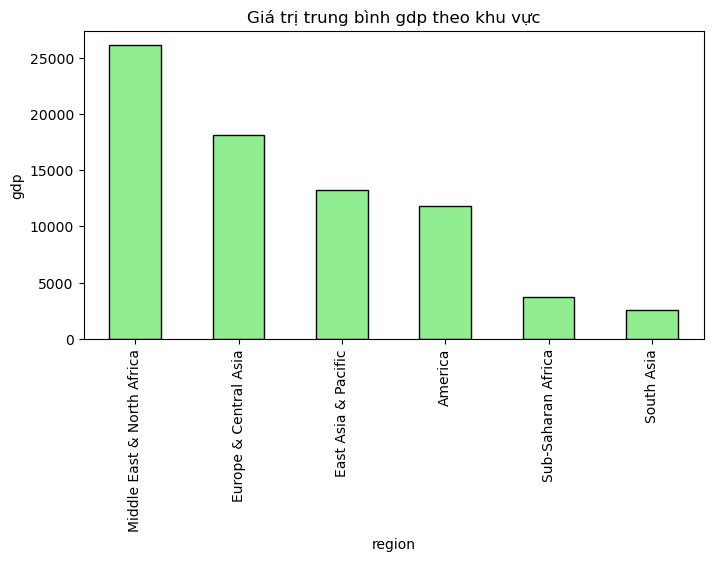

In [31]:
# 5️⃣ Biểu đồ bar theo khu vực và nhận xét -----------------------------------
region_mean = df_filled.groupby("region")[observed_features].mean()
display(region_mean)

for col in observed_features:
    plt.figure(figsize=(8, 4))
    region_mean[col].sort_values(ascending=False).plot(kind="bar", color="lightgreen", edgecolor="black")
    plt.title(f"Giá trị trung bình {col} theo khu vực")
    plt.ylabel(col)
    plt.show()

In [32]:
for col in observed_features:
    if col in region_mean.columns:
        max_region = region_mean[col].idxmax()
        print(f"Khu vực có {col} trung bình cao nhất là: {max_region}")

Khu vực có fertility trung bình cao nhất là: Sub-Saharan Africa
Khu vực có life trung bình cao nhất là: Europe & Central Asia
Khu vực có child_mortality trung bình cao nhất là: Sub-Saharan Africa
Khu vực có gdp trung bình cao nhất là: Middle East & North Africa


In [37]:
# 6️⃣ Tạo dataset mới trung bình theo quốc gia -------------------------------

# Tự động nhận diện tên cột quốc gia
country_col = None
for c in df_filled.columns:
    if "country" in c.lower() or "nation" in c.lower() or "location" in c.lower():
        country_col = c
        break

if country_col is None:
    print("⚠️ Không tìm thấy cột 'country' trong dữ liệu.")
else:
    country_mean = df_filled.groupby(country_col)[observed_features].mean()
    display(country_mean.head())

# 7️⃣ Tìm quốc gia có giá trị min/max cho từng thuộc tính --------------------
if country_col is not None:
    for col in observed_features:
        if col in country_mean.columns:
            min_country = country_mean[col].idxmin()
            max_country = country_mean[col].idxmax()
            print(
                f"🔹 {col}: Min = {min_country} ({country_mean[col].min():.2f}) | "
                f"Max = {max_country} ({country_mean[col].max():.2f})"
            )
else:
    print("⛔ Không thể tính min/max vì không xác định được tên cột quốc gia.")


,fertility,life,child_mortality,gdp
Country,,,,
Afghanistan,7.35978,47.35280,203.1980,1187.20
Albania,3.29010,71.64512,57.4434,5012.52
Algeria,5.06534,62.26872,106.0820,9662.18
Angola,6.98880,42.32716,229.6678,4719.16
Antigua and Barbuda,2.52870,70.63692,30.9178,13765.38


🔹 fertility: Min = Germany (1.56) | Max = Niger (7.62)
🔹 life: Min = Sierra Leone (38.68) | Max = Åland (80.14)
🔹 child_mortality: Min = Sweden (7.57) | Max = Mali (276.60)
🔹 gdp: Min = Malawi (600.96) | Max = Qatar (110391.56)


## C) Xác suất & Phân vị

In [29]:
from scipy.stats import binom, poisson, norm
if 'lifeExp' in df_clean.columns:
    p_hat = (df_clean['lifeExp']>75).mean(); n,k=30,10
    print('p̂ lifeExp>75=', round(p_hat,3))
    print('P(X>=10) with n=30:', 1 - binom.cdf(k-1, n, p_hat))
lam=3
print('Poisson λ=3, P(X>=5)=', 1 - poisson.cdf(4, lam))
if 'lifeExp' in df_clean.columns:
    mu = df_clean['lifeExp'].mean(); sigma = df_clean['lifeExp'].std(ddof=1)
    print('P(X>70)=', 1 - norm.cdf(70, mu, sigma))
    print('Quantile 90% =', norm.ppf(0.90, mu, sigma))
x,n=18,40; p_hat=x/n; z=1.645; se=(p_hat*(1-p_hat)/n)**0.5
print(f'CI90% p: ({p_hat - z*se:.3f}, {p_hat + z*se:.3f})')

Poisson λ=3, P(X>=5)= 0.1847367554762278
CI90% p: (0.321, 0.579)


In [50]:
# ============================================================
# PHẦN 1 – EDA (Exploratory Data Analysis)
# ============================================================

# 1) Xác định kích thước, định tính/định lượng
qual_cols = df.select_dtypes(include=["object","category","bool"]).columns.tolist()
quant_cols = df.select_dtypes(include=["number"]).columns.tolist()
print("\n🧩 Cột định tính:", qual_cols)
print("🧮 Cột định lượng:", quant_cols)

# 2) Xử lý trùng/thiếu (bản sạch df_clean)
dup_count = df.duplicated().sum()
print("\n🔁 Số dòng trùng lặp:", dup_count)
df_clean = df.drop_duplicates().copy()

# Điền thiếu cho cột số bằng mean; cho cột định tính bằng mode (nếu cần)
df_clean[quant_cols] = df_clean[quant_cols].apply(lambda s: s.fillna(s.mean()))
for c in qual_cols:
    if df_clean[c].isna().any():
        mode_val = df_clean[c].mode(dropna=True)
        if len(mode_val):
            df_clean[c] = df_clean[c].fillna(mode_val[0])
        else:
            df_clean[c] = df_clean[c].fillna("UNKNOWN")

print("✅ Sau khi xử lý thiếu & trùng. Shape:", df_clean.shape)
print("Thiếu dữ liệu mỗi cột (mới):"); display(df_clean.isna().sum())

# 3) Thống kê mô tả: mean, median, std, quantile
if quant_cols:
    desc = df_clean[quant_cols].agg(["mean","median","std","min","max",
                                     lambda s: s.quantile(0.25),
                                     lambda s: s.quantile(0.75)]).T
    desc.columns = ["mean","median","std","min","max","q25","q75"]
    print("\n📊 Thống kê mô tả (cột số):")
    display(desc)



🧩 Cột định tính: ['Country', 'region']
🧮 Cột định lượng: ['Year', 'fertility', 'life', 'population', 'child_mortality', 'gdp']

🔁 Số dòng trùng lặp: 0
✅ Sau khi xử lý thiếu & trùng. Shape: (10111, 8)
Thiếu dữ liệu mỗi cột (mới):


Country            0
Year               0
fertility          0
life               0
population         0
child_mortality    0
gdp                0
region             0
dtype: int64


📊 Thống kê mô tả (cột số):


,mean,median,std,min,max,q25,q75
Year,1.988515e+03,1989.000,1.443085e+01,1964.000,2.013000e+03,1976.000000,2.001000e+03
fertility,4.028719e+00,3.641,2.012872e+00,0.836,9.223000e+00,2.176991,5.903000e+00
life,6.407860e+01,67.157,1.112278e+01,6.000,8.358000e+01,56.282500,7.248400e+01
population,2.560448e+07,4772216.000,1.032230e+08,1170.000,1.359368e+09,887591.500000,1.479692e+07
child_mortality,8.083450e+01,61.400,7.560851e+01,2.000,4.358000e+02,20.710000,1.125500e+02
gdp,1.274692e+04,8207.000,1.679145e+04,142.000,1.826680e+05,2592.500000,1.402600e+04



🎯 Cột số chọn trực quan: ['gdp', 'life', 'fertility', 'child_mortality']


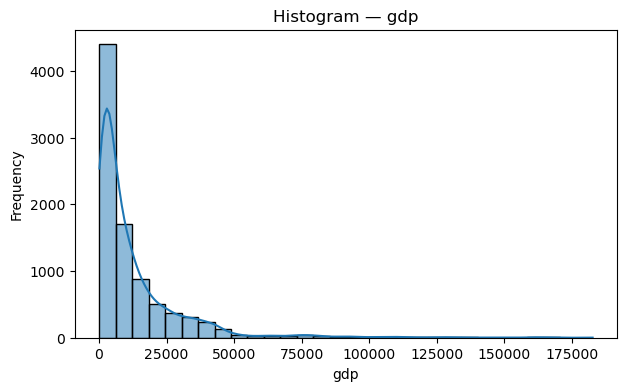

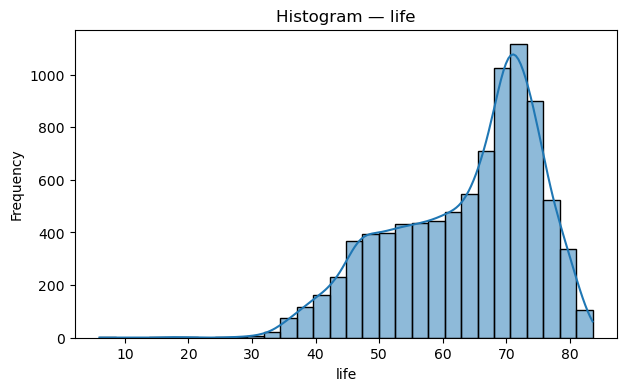

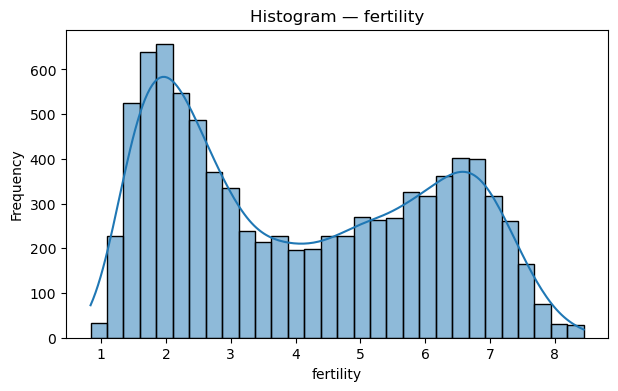

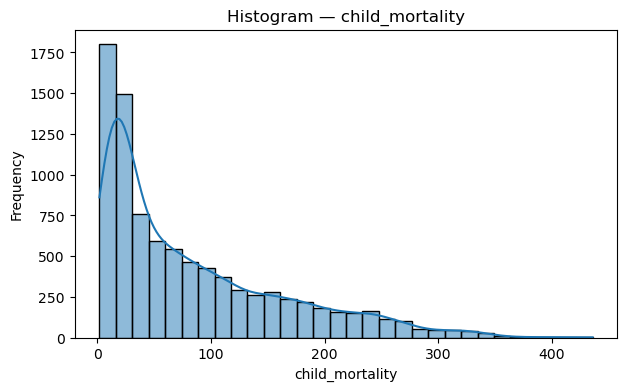

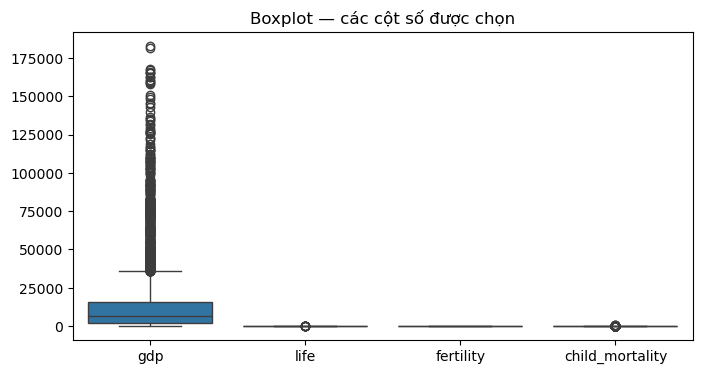

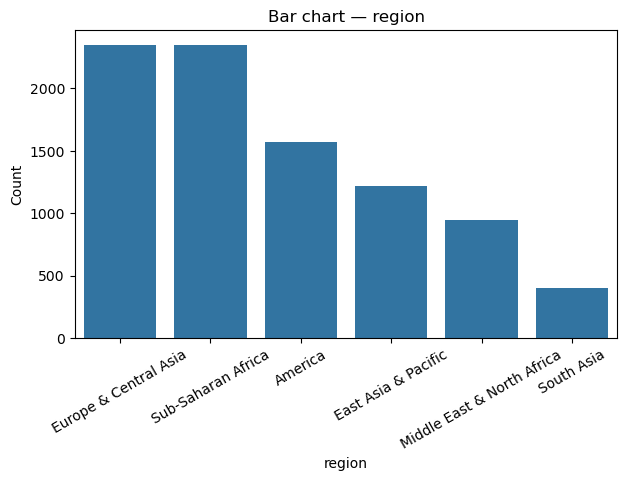

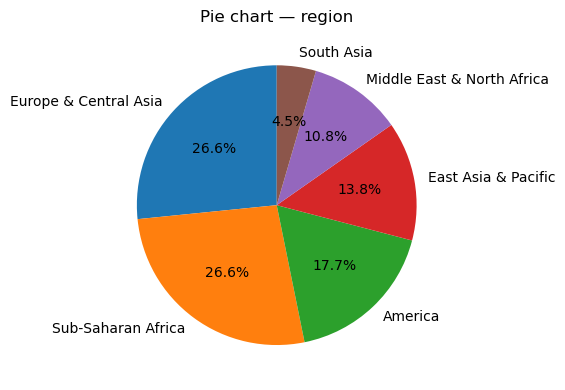

In [43]:
# 4) Vẽ Histogram & Boxplot cho một vài cột số nổi bật
#    Ưu tiên các cột gợi ý, nếu không thì lấy 4 cột số đầu
candidates = [c for c in TARGET_NUMERIC_COLS_HINT if c in df_clean.columns]
if not candidates:
    candidates = quant_cols[:4]
else:
    # nếu có nhiều, chọn tối đa 4 để trực quan gọn
    candidates = candidates[:4]

print("\n🎯 Cột số chọn trực quan:", candidates)

# Histogram
for col in candidates:
    plt.figure()
    sns.histplot(df_clean[col], kde=True, bins=30)
    plt.title(f"Histogram — {col}")
    plt.xlabel(col); plt.ylabel("Frequency")
    plt.show()

# Boxplot (multi)
if candidates:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df_clean[candidates])
    plt.title("Boxplot — các cột số được chọn")
    plt.show()

# 5) Bar chart & Pie chart cho 1 cột định tính đại diện (nếu có)
cat_col = None
if qual_cols:
    # chọn cột có ít mức để nhìn rõ (<=20)
    small_cats = [c for c in qual_cols if df_clean[c].nunique() <= 20 and df_clean[c].nunique() >= 2]
    cat_col = small_cats[0] if small_cats else qual_cols[0]

if cat_col:
    vc = df_clean[cat_col].value_counts().sort_values(ascending=False)
    plt.figure(); sns.barplot(x=vc.index, y=vc.values)
    plt.title(f"Bar chart — {cat_col}")
    plt.xticks(rotation=30); plt.ylabel("Count"); plt.xlabel(cat_col)
    plt.show()

    # Pie
    plt.figure()
    plt.pie(vc.values, labels=vc.index, autopct="%1.1f%%", startangle=90)
    plt.title(f"Pie chart — {cat_col}")
    plt.tight_layout(); plt.show()


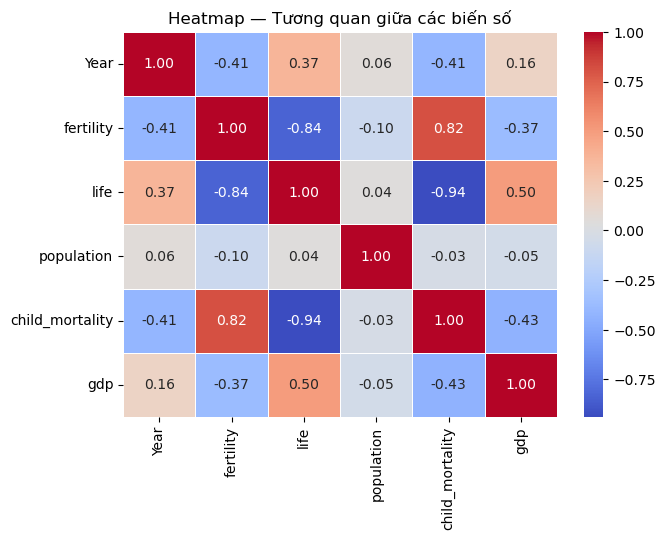

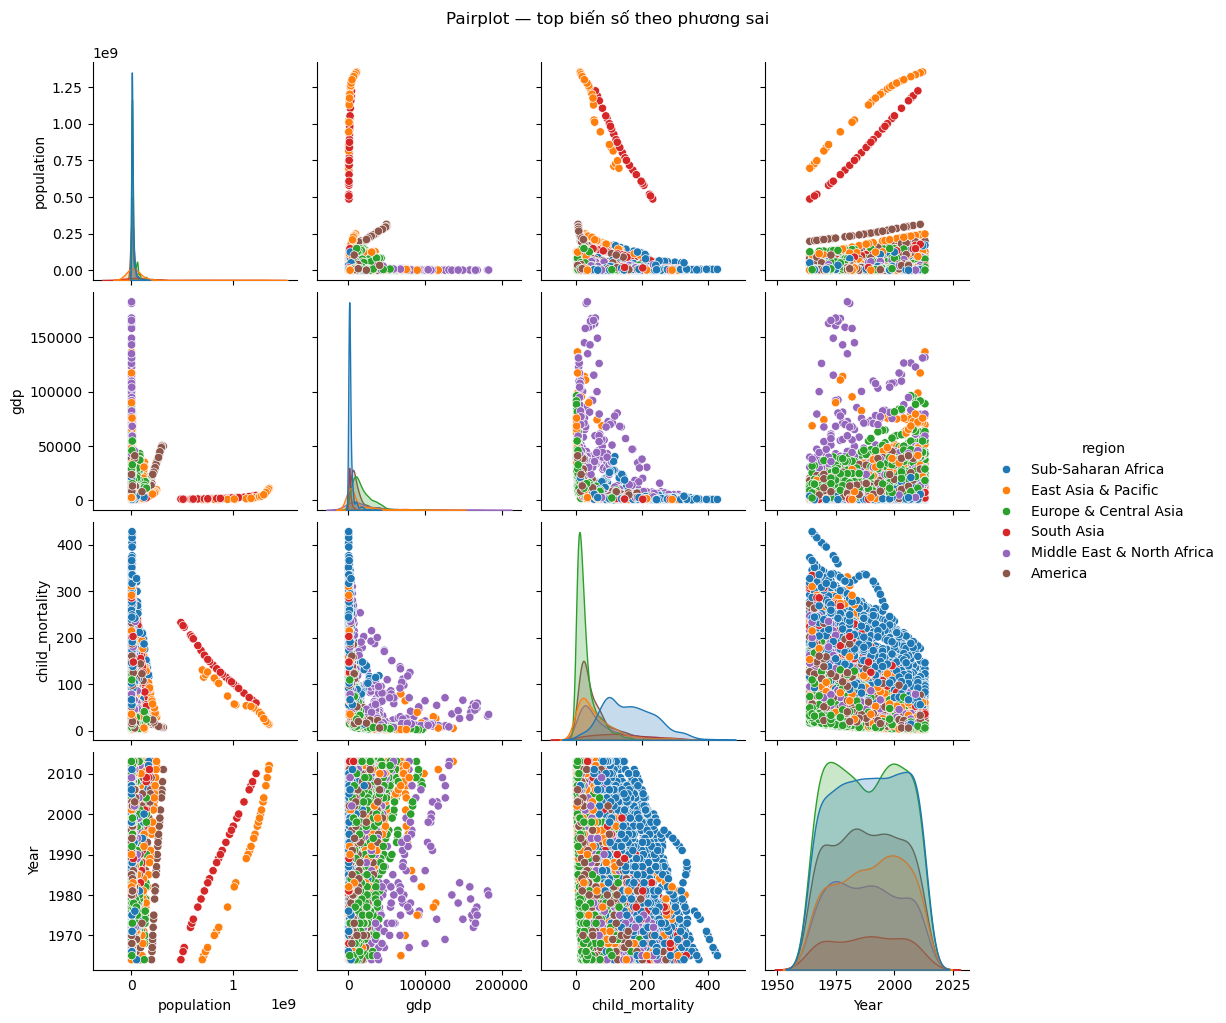

In [44]:
# 6) Heatmap tương quan + Pairplot (giới hạn hàng nếu quá lớn)
if len(quant_cols) >= 2:
    corr = df_clean[quant_cols].corr()
    plt.figure(figsize=(7,5))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.4)
    plt.title("Heatmap — Tương quan giữa các biến số")
    plt.show()

    # Pairplot: chọn 4 cột số có phương sai lớn nhất để nhìn rõ
    var_sorted = df_clean[quant_cols].var().sort_values(ascending=False).index.tolist()
    pp_cols = var_sorted[:4]
    if len(df_clean) > SEABORN_SAMPLE_ROWS:
        df_pp = df_clean.sample(SEABORN_SAMPLE_ROWS, random_state=1)
    else:
        df_pp = df_clean.copy()
    sns.pairplot(df_pp, vars=pp_cols, diag_kind="kde", hue=cat_col if cat_col else None)
    plt.suptitle("Pairplot — top biến số theo phương sai", y=1.02)
    plt.show()



🧷 Cột nhóm dùng để so sánh: region

📌 Thống kê theo nhóm (region):


gdp                                    \
                                    mean        median           std count   
region                                                                       
America                     11829.320833  10841.500000   8247.532390  2000   
East Asia & Pacific         13225.375338   6108.000000  18189.650050  1601   
Europe & Central Asia       18086.099870  13785.500000  13191.152329  2560   
Middle East & North Africa  26104.653968  12746.916667  33465.770537  1050   
South Asia                   2552.650000   1721.000000   2144.956486   400   
Sub-Saharan Africa           3728.097800   1867.000000   4731.058423  2500   

                                 life                           fertility  \
                                 mean   median        std count      mean   
region                                                                      
America                     68.722251  70.0140   6.780829  2000  3.486061   
East Asia & Pacific         66.108632  67.4380   9.685352  1601  3.726025   
Europe & Central Asia       71.931303  71.7945   5.147097  2560  2.221266   
Middle East & North Africa  65.194301  67.5955   8.928509  1050  4.970019   
South Asia                  57.137710  58.3880  10.278022   400  5.004162   
Sub-Saharan Africa          51.664426  50.6715   8.985240  2500  5.956105   

                                                   child_mortality          \
                            median       std count            mean  median   
region                                                                       
America                     3.0550  1.453148  2000       55.000832   41.70   
East Asia & Pacific         3.5660  1.727656  1601       63.110822   55.30   
Europe & Central Asia       1.9725  1.015692  2560       33.662653   20.10   
Middle East & North Africa  4.9490  1.930481  1050       70.572816   51.20   
South Asia                  5.1510  1.806937   400      137.767150  128.05   
Sub-Saharan Africa          6.2480  1.329394  2500      156.356352  150.00   

                                             
                                  std count  
region                                       
America                     44.948886  2000  
East Asia & Pacific         54.041198  1601  
Europe & Central Asia       34.307795  2560  
Middle East & North Africa  60.564817  1050  
South Asia                  82.264062   400  
Sub-Saharan Africa          80.821230  2500

/var/folders/_l/jkzl_h7n1h9241fb7cqx7k5w0000gn/T/ipykernel_50387/1397287772.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.catplot(data=df_clean, x=group_col, y=col, kind="bar", ci="sd", height=4, aspect=1.6)


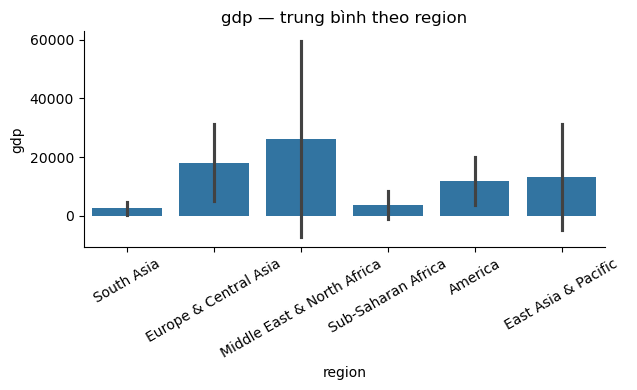

/var/folders/_l/jkzl_h7n1h9241fb7cqx7k5w0000gn/T/ipykernel_50387/1397287772.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.catplot(data=df_clean, x=group_col, y=col, kind="bar", ci="sd", height=4, aspect=1.6)


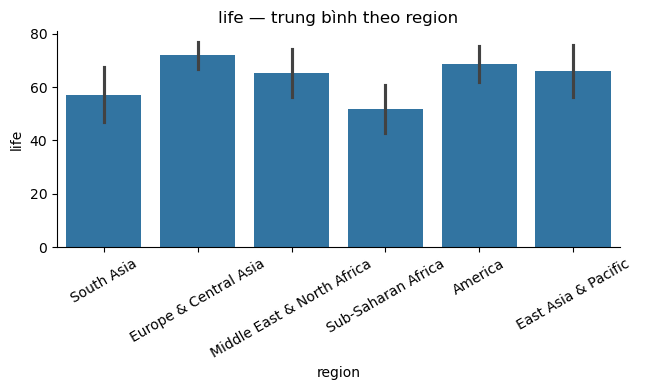

/var/folders/_l/jkzl_h7n1h9241fb7cqx7k5w0000gn/T/ipykernel_50387/1397287772.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.catplot(data=df_clean, x=group_col, y=col, kind="bar", ci="sd", height=4, aspect=1.6)


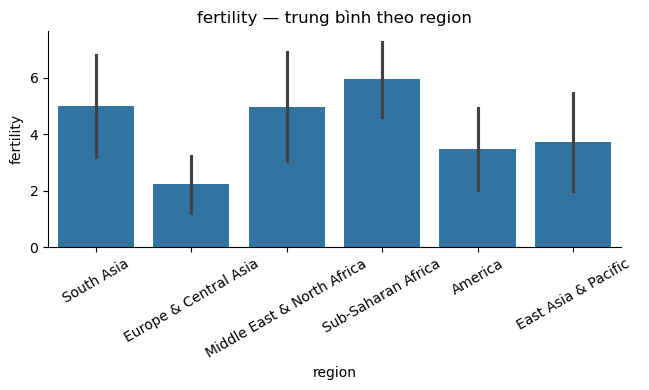

/var/folders/_l/jkzl_h7n1h9241fb7cqx7k5w0000gn/T/ipykernel_50387/1397287772.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.catplot(data=df_clean, x=group_col, y=col, kind="bar", ci="sd", height=4, aspect=1.6)


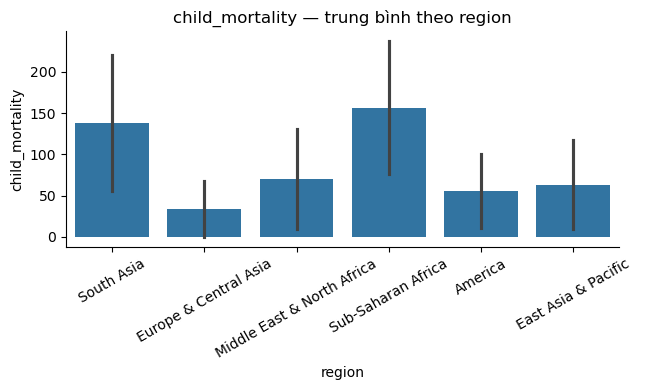

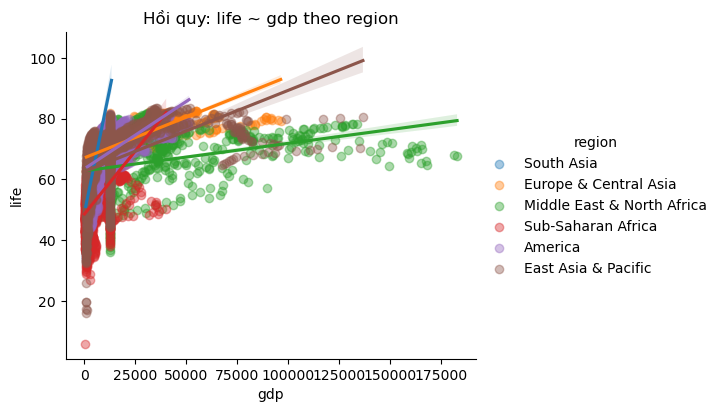

In [51]:
# 7) Groupby & So sánh giữa nhóm (giới tính/vùng/loại/năm)
#    Tự động chọn cột nhóm ưu tiên trong GROUP_COL_PRIORITIES
group_col = None
for c in GROUP_COL_PRIORITIES:
    if c in df_clean.columns:
        group_col = c; break

if (group_col is None) and qual_cols:
    group_col = qual_cols[0]

print("\n🧷 Cột nhóm dùng để so sánh:", group_col)

if group_col and candidates:
    gstat = df_clean.groupby(group_col)[candidates].agg(["mean","median","std","count"])
    print(f"\n📌 Thống kê theo nhóm ({group_col}):")
    display(gstat)

    # catplot (bar) trung bình theo nhóm cho từng cột số
    for col in candidates:
        sns.catplot(data=df_clean, x=group_col, y=col, kind="bar", ci="sd", height=4, aspect=1.6)
        plt.title(f"{col} — trung bình theo {group_col}")
        plt.xticks(rotation=30); plt.tight_layout(); plt.show()

    # lmplot (hồi quy) nếu có 2 cột số để so sánh theo nhóm
    if len(candidates) >= 2:
        xcol, ycol = candidates[0], candidates[1]
        sns.lmplot(data=df_clean, x=xcol, y=ycol, hue=group_col, height=4, aspect=1.3, scatter_kws={"alpha":0.4})
        plt.title(f"Hồi quy: {ycol} ~ {xcol} theo {group_col}")
        plt.show()


🧪 Binomial — p̂ = P(gdp > median) = 0.500, n=30, k=10
P(X ≥ 10) = 0.9785

🧪 Poisson — λ=2.50, P(X ≤ 3) = 0.7576

🧪 Normal — biến: gdp, μ=12746.917, σ=16791.447
P(X < 12746.917) = 0.5000
Phân vị 95% (X0.95) = 40366.389


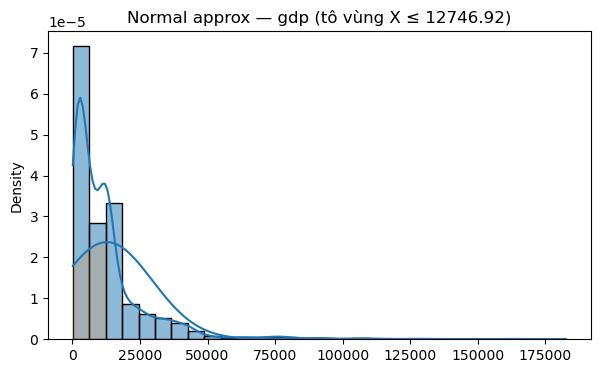

In [52]:
# ============================================================
# PHẦN 2 – THỐNG KÊ & XÁC SUẤT
# ============================================================

# Ý tưởng: dùng dữ liệu thật nếu có (p̂ từ tỷ lệ điều kiện, μ&σ từ cột số),
# nếu không thì dùng ví dụ giả định để minh họa.

# ---- Binomial: ví dụ dùng tỷ lệ điều kiện từ 1 cột số (nếu có) ----
# Lấy 1 cột số đại diện để tạo điều kiện (ví dụ life > 75, price > 10000...)
bin_col = None
for hint in TARGET_NUMERIC_COLS_HINT:
    if hint in df_clean.columns:
        bin_col = hint; break
if (bin_col is None) and quant_cols:
    bin_col = quant_cols[0]

if bin_col:
    # Tạo ngưỡng theo median để có tỷ lệ p̂ không quá lệch
    thr = df_clean[bin_col].median()
    p_hat = (df_clean[bin_col] > thr).mean()
    n, k = 30, 10
    p_ge_k = 1 - binom.cdf(k-1, n, p_hat)
    print(f"\n🧪 Binomial — p̂ = P({bin_col} > median) = {p_hat:.3f}, n={n}, k={k}")
    print(f"P(X ≥ {k}) = {p_ge_k:.4f}")

# ---- Poisson: ví dụ “≤ 3 lỗi / đơn vị chiều dài” ----
# Nếu không có dữ liệu sự kiện đếm, dùng λ giả định (ví dụ λ = 2.5 per unit)
lam = 2.5
p_le_3 = poisson.cdf(3, lam)
print(f"\n🧪 Poisson — λ={lam:.2f}, P(X ≤ 3) = {p_le_3:.4f}")

# ---- Normal: dùng một cột số để tính P(X < a) và phân vị 95% ----
norm_col = bin_col  # tận dụng cột đã chọn
if norm_col:
    mu  = df_clean[norm_col].mean()
    sd  = df_clean[norm_col].std(ddof=1)
    a   = mu  # ví dụ P(X < mean) ~ 0.5 khi đối xứng; vẫn in ra giá trị tổng quát
    p_lt_a = norm.cdf(a, mu, sd)
    q95 = norm.ppf(0.95, mu, sd)
    print(f"\n🧪 Normal — biến: {norm_col}, μ={mu:.3f}, σ={sd:.3f}")
    print(f"P(X < {a:.3f}) = {p_lt_a:.4f}")
    print(f"Phân vị 95% (X0.95) = {q95:.3f}")

# Mô phỏng trực quan Normal: histogram + KDE + vùng xác suất (ví dụ P(X < a))
if norm_col:
    x = df_clean[norm_col].dropna().values
    plt.figure()
    sns.histplot(x, kde=True, stat="density", bins=30)
    # Vẽ đường cong chuẩn ước lượng
    xs = np.linspace(x.min(), x.max(), 400)
    ys = norm.pdf(xs, mu, sd)
    plt.plot(xs, ys)
    # Tô vùng P(X<a)
    plt.fill_between(xs, 0, ys, where=(xs<=a), alpha=0.2)
    plt.title(f"Normal approx — {norm_col} (tô vùng X ≤ {a:.2f})")
    plt.show()



In [53]:
# ============================================================
# PHẦN 3 – NHẬN XÉT TỰ LUẬN (ghi bằng lời)
# ============================================================

print("\n================= GỢI Ý TỰ LUẬN =================")
print("- Histogram và Boxplot cho thấy phân phối biến số lệch trái/phải hay gần đối xứng?")
print("- Heatmap/pairplot gợi ý biến nào tương quan mạnh? (ví dụ GDP ↔ Life)")
print("- Nhóm nào (giới tính/vùng/loại/năm) có giá trị trung bình cao nhất ở biến quan trọng?")
print("- Với Binomial: tỉ lệ vượt ngưỡng có lớn không? Điểm khác giữa lấy mẫu và tổng thể?")
print("- Với Poisson: λ hợp lý thế nào trong bối cảnh? (lỗi hiếm, sự kiện đếm)")
print("- Với Normal: phân vị 95% nói gì? So sánh P(X < a) với thực tế.")
print("==================================================")



================= GỢI Ý TỰ LUẬN =================
- Histogram và Boxplot cho thấy phân phối biến số lệch trái/phải hay gần đối xứng?
- Heatmap/pairplot gợi ý biến nào tương quan mạnh? (ví dụ GDP ↔ Life)
- Nhóm nào (giới tính/vùng/loại/năm) có giá trị trung bình cao nhất ở biến quan trọng?
- Với Binomial: tỉ lệ vượt ngưỡng có lớn không? Điểm khác giữa lấy mẫu và tổng thể?
- Với Poisson: λ hợp lý thế nào trong bối cảnh? (lỗi hiếm, sự kiện đếm)
- Với Normal: phân vị 95% nói gì? So sánh P(X < a) với thực tế.
